In [1]:
from pycaret.datasets import get_data
from pandas_profiling import ProfileReport

In [2]:
#Guardamos los datos en un csv en la carpeta de data/raw
import pandas as pd
import numpy as np
data =pd.read_csv('../data/archive/world_wide_self_harm_and_substance_deaths.csv')

In [3]:
profile = ProfileReport(data, title="Profile Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Comentarios sobre el profiling:

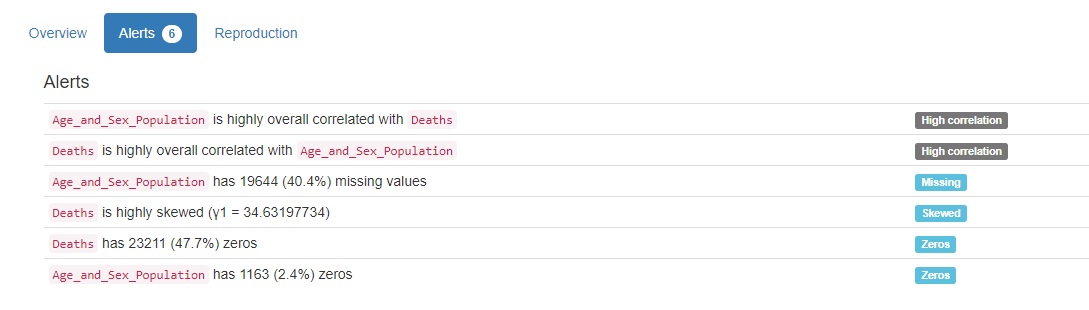

La correlación entre Age_and_Sex_Population y es un indicador, ya que a mayor cantidad de población, mayor la cantidad de muertes, esta no es una alerta que podamos modificar debido a la naturaleza de los datos.

Age_and_Sex_Population poseen un 40.4% de datos faltantes, debido a que es una columna importante en el modelo, haremos una imputación con la media de los datos (esto se considerará como un caso aislado debido a que comunmente se recomienda descartar las columnas con más del 5% de datos faltantes)

In [4]:
#Realizamos la imputación de los datos
mean_population = data['Age_and_Sex_Population'].mean()
data['Age_and_Sex_Population'].fillna(mean_population, inplace=True)

# Realizamos una transformación logarítmica para la columna de 'Deaths' para intentar normalizar la distribución
data['Deaths_Log'] = np.log1p(data['Deaths'])


In [5]:
profile = ProfileReport(data, title="Profile Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

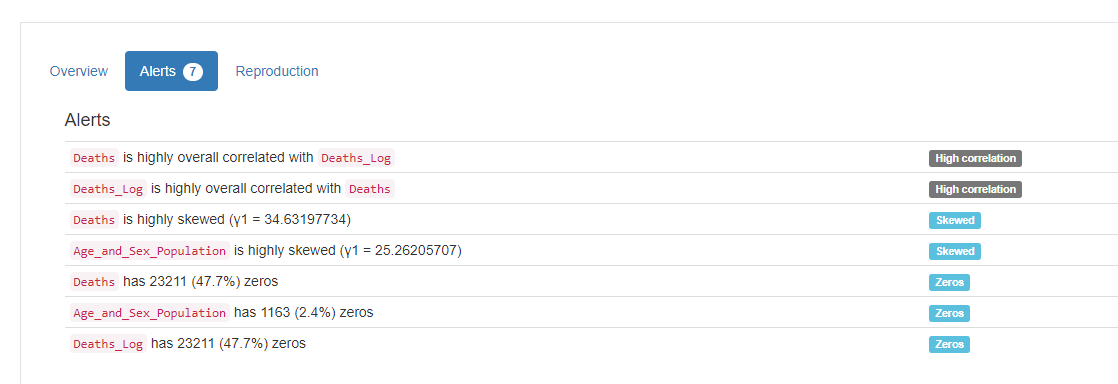

Luego de la imputación de los datos ya no tenemos valores faltantes, sin embargo las columnas tienen sesgos importantes, aunque el sesgo de la columna de Age_and_Sex_Population se debe a la imputación de la media, el sesgo de la columna de Deaths se debe enteramente a que existen ceros "0" en los datos, por lo que no se puede aplicar una transformación logarítmica en este caso para tratar de normalizar la distribución.

In [6]:
# Elimina las columnas 'Age_and_Sex_Population' e 'ISO_Code'
data_clean = data.drop(['Age_and_Sex_Population', 'ISO_Code','Deaths_Log'], axis=1)




In [7]:
data_clean.head()


Year                  Cause Age_Range     Sex  Deaths         Country
0  2017  Intentional self-harm         0  Female       0  United Kingdom
1  2017  Intentional self-harm         0    Male       0  United Kingdom
2  2017  Intentional self-harm         1  Female       0  United Kingdom
3  2017  Intentional self-harm         1    Male       0  United Kingdom
4  2017  Intentional self-harm     10-14  Female      16  United Kingdom

In [8]:
print(f"Filas en Train: {data_clean.shape[0]}")

Filas en Train: 48631


In [9]:
dc1 = data_clean[data_clean['Deaths'] != 0]
print(f"Filas en Train: {dc1.shape[0]}")


Filas en Train: 25420


In [10]:
dc1.head()

Year                  Cause Age_Range     Sex  Deaths         Country
4   2017  Intentional self-harm     10-14  Female      16  United Kingdom
5   2017  Intentional self-harm     10-14    Male      16  United Kingdom
6   2017  Intentional self-harm     15-19  Female     104  United Kingdom
7   2017  Intentional self-harm     15-19    Male     208  United Kingdom
10  2017  Intentional self-harm     20-24  Female     136  United Kingdom

In [11]:
num_filas_train = int(len(dc1)*0.8)

data_train = dc1.sample(n=num_filas_train,random_state=2023)
data_test = dc1.drop(data_train.index)

In [12]:
print(f"Filas en Train: {data_train.shape[0]}")
print(f"Filas en Test: {data_test.shape[0]}")

Filas en Train: 20336
Filas en Test: 5084


In [14]:
import pandas as pd

data_train1 = pd.get_dummies(data_train, columns=data_train.columns.drop(['Deaths']))


In [17]:
data_train1.columns.values

array(['Deaths', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020',
       'Year_2021', 'Cause_Intentional self-harm',
       'Cause_Mental and behavioural disorders due to psychoactive substance use',
       'Age_Range_0', 'Age_Range_1', 'Age_Range_10-14', 'Age_Range_15-19',
       'Age_Range_15-24', 'Age_Range_20-24', 'Age_Range_25-29',
       'Age_Range_25-34', 'Age_Range_3', 'Age_Range_30-34',
       'Age_Range_35-39', 'Age_Range_35-44', 'Age_Range_4',
       'Age_Range_40-44', 'Age_Range_45-49', 'Age_Range_45-54',
       'Age_Range_5-14', 'Age_Range_5-9', 'Age_Range_50-54',
       'Age_Range_55-59', 'Age_Range_55-64', 'Age_Range_60-64',
       'Age_Range_65-69', 'Age_Range_65-74', 'Age_Range_70-74',
       'Age_Range_75+', 'Age_Range_75-79', 'Age_Range_80-84',
       'Age_Range_85+', 'Age_Range_85-89', 'Age_Range_90-94',
       'Age_Range_95+', 'Age_Range_All', 'Age_Range_Unknown', 'Sex_All',
       'Sex_Female', 'Sex_Male', 'Sex_Unspecified', 'Country_Andorra',
       'Country_A

In [17]:
data_train1.head()

Deaths  Year_2017  Year_2018  Year_2019  Year_2020  Year_2021  \
27576       6          1          0          0          0          0   
47895      52          0          0          1          0          0   
3458      246          0          1          0          0          0   
34520      18          0          0          0          1          0   
19597      31          1          0          0          0          0   

       Cause_Intentional self-harm  \
27576                            1   
47895                            0   
3458                             1   
34520                            0   
19597                            1   

       Cause_Mental and behavioural disorders due to psychoactive substance use  \
27576                                                  0                          
47895                                                  1                          
3458                                                   0                          
34520                                                  1                          
19597                                                  0                          

       Age_Range_0  Age_Range_1  ...  Country_Tunisia  Country_Turkey  \
27576            0            0  ...                0               0   
47895            0            0  ...                0               0   
3458             0            0  ...                0               0   
34520            0            0  ...                0               0   
19597            0            0  ...                0               0   

       Country_Turks and Caicos Islands  Country_Ukraine  \
27576                                 0                0   
47895                                 0                0   
3458                                  0                0   
34520                                 0                0   
19597                                 0                0   

       Country_United Arab Emirates  Country_United Kingdom  \
27576                             0                       0   
47895                             0                       1   
3458                              0                       0   
34520                             0                       0   
19597                             0                       0   

       Country_United States of America  Country_Uruguay  Country_Uzbekistan  \
27576                                 0                0                   0   
47895                                 0                0                   0   
3458                                  0                0                   0   
34520                                 0                0                   0   
19597                                 0                0                   0   

       Country_Virgin Islands (USA)  
27576                             0  
47895                             0  
3458                              0  
34520                             0  
19597                             0  

[5 rows x 155 columns]

In [18]:
from pycaret.regression import *

# Configura la sesión de PyCaret
dataset = setup(data=data_train1,
                target='Deaths',
                session_id=123,
                normalize=True,
                normalize_method='minmax',
                transformation=True
                )

# Compara modelos y selecciona el mejor en función del MAPE (Error absoluto porcentaje medio)
best = compare_models(sort='MAPE')

In [19]:
llar=create_model('llar')
final_model=finalize_model(estimator=best)
save_model(model=final_model,model_name='modelo2')


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year_2017', 'Year_2018',
                                              'Year_2019', 'Year_2020',
                                              'Year_2021',
                                              'Cause_Intentional self-harm',
                                              'Cause_Mental and behavioural '
                                              'disorders due to psychoactive '
                                              'substance use',
                                              'Age_Range_0', 'Age_Range_1',
                                              'Age_Range_10-14',
                                              'Age_Range_15-19',
                                              'Age_Range_15-24',
                                              'Age_Range_20-...
                  TransformerWrapper(include=[],
                                     

In [20]:
from pycaret.regression import *

# Configura la sesión de PyCaret con un nuevo session_id y un método de normalización diferente
dataset = setup(data=data_train1,
                target='Deaths',
                session_id=456,  # Cambia el ID de sesión a 456 
                normalize=True,
                normalize_method='robust',  # Cambia el método de normalización a 'robust' 
                transformation=True
                )

# Compara modelos y selecciona el mejor en función del MAPE (Error absoluto porcentaje medio)
best = compare_models(sort='MAPE')


In [21]:
llar=create_model('llar')
final_model=finalize_model(estimator=best)
save_model(model=final_model,model_name='modelo3')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year_2017', 'Year_2018',
                                              'Year_2019', 'Year_2020',
                                              'Year_2021',
                                              'Cause_Intentional self-harm',
                                              'Cause_Mental and behavioural '
                                              'disorders due to psychoactive '
                                              'substance use',
                                              'Age_Range_0', 'Age_Range_1',
                                              'Age_Range_10-14',
                                              'Age_Range_15-19',
                                              'Age_Range_15-24',
                                              'Age_Range_20-...
                  TransformerWrapper(include=[],
                                     

In [22]:
from pycaret.regression import *

dataset = setup(data=data_train1,
                target='Deaths',
                session_id=789,  # Cambia el ID de sesión a 789 
                normalize=True,
                normalize_method='zscore',  # Cambia el método de normalización a 'zscore' 
                transformation=True
                )

# Compara modelos y selecciona el mejor en función del MAPE (Error absoluto porcentaje medio)
best = compare_models(sort='MAPE')


In [23]:
llar=create_model('llar')
final_model=finalize_model(estimator=best)
save_model(model=final_model,model_name='modelo4')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year_2017', 'Year_2018',
                                              'Year_2019', 'Year_2020',
                                              'Year_2021',
                                              'Cause_Intentional self-harm',
                                              'Cause_Mental and behavioural '
                                              'disorders due to psychoactive '
                                              'substance use',
                                              'Age_Range_0', 'Age_Range_1',
                                              'Age_Range_10-14',
                                              'Age_Range_15-19',
                                              'Age_Range_15-24',
                                              'Age_Range_20-...
                  TransformerWrapper(include=[],
                                     